# Trabalho 1 - Ciência de dados


## Análise de músicas mais ouvidas no Spotify

###### Este notebook tem como objetivo fazer uma análise geral das músicas mais escutadas no Spotify pelos brasileiros. Ele conta com informações sobre as top 200 músicas do Brasil em todos os dias de 2017 a 2020

### **Passo 1**: Tratamento inicial do DataFrame

In [ ]:
#Configurações iniciais para o ambiente
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns
import numpy as np
sns.set()

In [ ]:
df1 = pd.read_csv('https://raw.githubusercontent.com/thaisaraujo2000/Dados_Spotify/main/df_top.csv') #Data frame inicial
df1.info()
df = df1.dropna() #Retirando valores nulos
df.info()
df #Mostrando o dataframe inicial

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 274600 entries, 0 to 274599
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Unnamed: 0      274600 non-null  int64  
 1   Position        274600 non-null  float64
 2   Track Name      274559 non-null  object 
 3   Artist          274559 non-null  object 
 4   Streams         274600 non-null  float64
 5   URL             274600 non-null  object 
 6   data_chart      274600 non-null  object 
 7   data_chart_int  274600 non-null  int64  
 8   track_id        274600 non-null  object 
dtypes: float64(2), int64(2), object(5)
memory usage: 18.9+ MB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 274559 entries, 0 to 274599
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Unnamed: 0      274559 non-null  int64  
 1   Position        274559 non-null  float64
 2   Track Name      274559

,Unnamed: 0,Position,Track Name,Artist,Streams,URL,data_chart,data_chart_int,track_id
0,0,1.0,Deu Onda,MC G15,612271.0,https://open.spotify.com/track/0EPxmvsG1BY5td4...,2017-01-01,20170101,0EPxmvsG1BY5td4aTOkWBF
1,1,2.0,Hear Me Now,Alok,269574.0,https://open.spotify.com/track/1a5Yu5L18qNxVhX...,2017-01-01,20170101,1a5Yu5L18qNxVhXx38njON
2,2,3.0,10% - Ao Vivo,Maiara & Maraisa,228307.0,https://open.spotify.com/track/2wFnRPjuqwNySFi...,2017-01-01,20170101,2wFnRPjuqwNySFiK0Qfg8L
3,3,4.0,Eu Sei de Cor - Ao Vivo | Acústico,Marília Mendonça,217394.0,https://open.spotify.com/track/45wqPwIH4A5cr2I...,2017-01-01,20170101,45wqPwIH4A5cr2IyyD4WKf
4,4,5.0,Meu Coração Deu PT - Ao Vivo,Wesley Safadão,214171.0,https://open.spotify.com/track/6zCqeUUqLb2CapB...,2017-01-01,20170101,6zCqeUUqLb2CapBmVwAHll
...,...,...,...,...,...,...,...,...,...
274595,195,196.0,I Don't Care (with Justin Bieber),Ed Sheeran,78523.0,https://open.spotify.com/track/0hVXuCcriWRGvwM...,2020-10-07,20201007,0hVXuCcriWRGvwMV1r5Yn9
274596,196,197.0,Psicose,Hungria Hip Hop,78313.0,https://open.spotify.com/track/3Hi829to1jWWtcU...,2020-10-07,20201007,3Hi829to1jWWtcUxMdbJng
274597,197,198.0,Tijolão - Ao Vivo,Jorge & Mateus,78179.0,https://open.spotify.com/track/6QwFUcPc5nhsqZu...,2020-10-07,20201007,6QwFUcPc5nhsqZuhXUYtV7
274598,198,199.0,Shape of You,Ed Sheeran,78085.0,https://open.spotify.com/track/7qiZfU4dY1lWllz...,2020-10-07,20201007,7qiZfU4dY1lWllzX7mPBI3


In [ ]:
#Tratamento dos dataframes de outubro, novembro e dezembro de 2020

#Outubro de 2020
df_out_2020 = pd.read_csv('https://raw.githubusercontent.com/thaisaraujo2000/Dados_Spotify/main/2020-10-unico.csv')
df_out_2020 = df_out_2020.rename(columns={'Unnamed: 0': 'Track Name', 'Unnamed: 1': 'Artist', 'Unnamed: 2': 'Streams','Note that these figures are generated using a formula that protects against any artificial inflation of chart positions.': 'URL', 'Unnamed: 4': 'data_chart'})
df_out_2020['Position'] = df_out_2020.index 
df_out_2020 = df_out_2020.drop(df_out_2020.index[0])
df_out_2020 = df_out_2020.drop(columns=['URL'])
df_out_2020['Streams'] = df_out_2020['Streams'].apply(pd.to_numeric)


#Novembro de 2020
df_nov_2020 = pd.read_csv('https://raw.githubusercontent.com/thaisaraujo2000/Dados_Spotify/main/2020-11-unico.csv')
df_nov_2020 = df_nov_2020.rename(columns={'Unnamed: 0': 'Track Name', 'Unnamed: 1': 'Artist', 'Unnamed: 2': 'Streams','Note that these figures are generated using a formula that protects against any artificial inflation of chart positions.': 'URL', 'Unnamed: 4': 'data_chart'})
df_nov_2020['Position'] = df_nov_2020.index 
df_nov_2020 = df_nov_2020.drop(df_nov_2020.index[0])
df_nov_2020 = df_nov_2020.drop(columns=['URL'])
df_nov_2020['data_chart'].fillna('2020-11-29', inplace=True)
df_nov_2020['Streams'] = df_nov_2020['Streams'].apply(pd.to_numeric)


#Dezembro de 2020
df_dez_2020 = pd.read_csv('https://raw.githubusercontent.com/thaisaraujo2000/Dados_Spotify/main/2020-12-unico.csv')
df_dez_2020 = df_dez_2020.rename(columns={'Unnamed: 0': 'Position', 'Position': 'Track Name', 'Track Name': 'Artist','Artist': 'Streams', 'Streams': 'URL', 'URL': 'data_chart', 'data_chart': 'sai'})
df_dez_2020 = df_dez_2020.drop(columns=['URL', 'sai'])
df_dez_2020.replace(['2020-12-3'], ['2020-12-31'], inplace=True)
df_dez_2020['Streams'] = df_dez_2020['Streams'].apply(pd.to_numeric)


#Unindo com o dataframe com mais dados
df = pd.concat([df, df_out_2020, df_nov_2020, df_dez_2020], ignore_index=True)
df

,Unnamed: 0,Position,Track Name,Artist,Streams,URL,data_chart,data_chart_int,track_id
0,0.0,1,Deu Onda,MC G15,612271.0,https://open.spotify.com/track/0EPxmvsG1BY5td4...,2017-01-01,20170101.0,0EPxmvsG1BY5td4aTOkWBF
1,1.0,2,Hear Me Now,Alok,269574.0,https://open.spotify.com/track/1a5Yu5L18qNxVhX...,2017-01-01,20170101.0,1a5Yu5L18qNxVhXx38njON
2,2.0,3,10% - Ao Vivo,Maiara & Maraisa,228307.0,https://open.spotify.com/track/2wFnRPjuqwNySFi...,2017-01-01,20170101.0,2wFnRPjuqwNySFiK0Qfg8L
3,3.0,4,Eu Sei de Cor - Ao Vivo | Acústico,Marília Mendonça,217394.0,https://open.spotify.com/track/45wqPwIH4A5cr2I...,2017-01-01,20170101.0,45wqPwIH4A5cr2IyyD4WKf
4,4.0,5,Meu Coração Deu PT - Ao Vivo,Wesley Safadão,214171.0,https://open.spotify.com/track/6zCqeUUqLb2CapB...,2017-01-01,20170101.0,6zCqeUUqLb2CapBmVwAHll
...,...,...,...,...,...,...,...,...,...
291554,NaN,196,Certo e Duvidoso (feat. Gaab) - Ao Vivo,Marcos & Belutti,122141.0,NaN,2020-12-31,NaN,NaN
291555,NaN,197,Hoje É Rave,Bárbara Labres,121951.0,NaN,2020-12-31,NaN,NaN
291556,NaN,198,Cerveja De Garrafa (Fumaça Que Eu Faço) - Ao Vivo,Atitude 67,121919.0,NaN,2020-12-31,NaN,NaN
291557,NaN,199,Fatalmente / Separação / Temporal - Ao Vivo,Grupo Menos É Mais,121665.0,NaN,2020-12-31,NaN,NaN


In [ ]:
#Criando uma nova coluna para o ano
new_df = df.data_chart.str.split("-", n=3, expand=True)[0] 
serie = pd.Series(new_df)
serie.name = 'year'
serie = pd.to_numeric(serie)

#Criando coluna para o dia da semana
dia_semana = df.data_chart
lista_dia_semana = [datetime.strptime(i, '%Y-%m-%d').date() for i in dia_semana]
dia_semana_ok = [str(i.weekday()) for i in lista_dia_semana]
df['weekday'] = dia_semana_ok
df.weekday.replace(['0', '1', '2', '3', '4', '5', '6'], ['Segunda', 'Terça', 'Quarta', 'Quinta', 'Sexta', 'Sábado', 'Domingo'], inplace=True)

#Criando a coluna para o mês
new_df2 = df.data_chart.str.split("-", n=3, expand=True)[1] 
mes_ok = [str(i) for i in new_df2]
df['month'] = mes_ok
df.month.replace(['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12'], ['Janeiro', 'Fevereiro', 'Março', 'Abril', 'Maio', 'Junho', 'Julho', 'Agosto', 'Setembro', 'Outubro', 'Novembro', 'Dezembro'], inplace=True)


#Retirando colunas desnecessárias para a análise do data_frame
df.drop(columns=['data_chart_int', 'track_id', 'URL', 'Unnamed: 0'], inplace=True)
df

df.Position = pd.to_numeric(df.Position)

#Criando o data_frame final
df_ok = pd.concat([df, serie], axis=1)
df_ok


,Position,Track Name,Artist,Streams,data_chart,weekday,month,year
0,1.0,Deu Onda,MC G15,612271.0,2017-01-01,Domingo,Janeiro,2017
1,2.0,Hear Me Now,Alok,269574.0,2017-01-01,Domingo,Janeiro,2017
2,3.0,10% - Ao Vivo,Maiara & Maraisa,228307.0,2017-01-01,Domingo,Janeiro,2017
3,4.0,Eu Sei de Cor - Ao Vivo | Acústico,Marília Mendonça,217394.0,2017-01-01,Domingo,Janeiro,2017
4,5.0,Meu Coração Deu PT - Ao Vivo,Wesley Safadão,214171.0,2017-01-01,Domingo,Janeiro,2017
...,...,...,...,...,...,...,...,...
291554,196.0,Certo e Duvidoso (feat. Gaab) - Ao Vivo,Marcos & Belutti,122141.0,2020-12-31,Quinta,Dezembro,2020
291555,197.0,Hoje É Rave,Bárbara Labres,121951.0,2020-12-31,Quinta,Dezembro,2020
291556,198.0,Cerveja De Garrafa (Fumaça Que Eu Faço) - Ao Vivo,Atitude 67,121919.0,2020-12-31,Quinta,Dezembro,2020
291557,199.0,Fatalmente / Separação / Temporal - Ao Vivo,Grupo Menos É Mais,121665.0,2020-12-31,Quinta,Dezembro,2020


In [ ]:
#Criando um data_frame para cada ano
df_2017 = df_ok[df_ok.year == 2017]
df_2018 = df_ok[df_ok.year == 2018]
df_2019 = df_ok[df_ok.year == 2019]
df_2020 = df_ok[df_ok.year == 2020]

df_2020.head()

,Position,Track Name,Artist,Streams,data_chart,weekday,month,year
218380,1.0,Liberdade Provisória,Henrique & Juliano,971699.0,2020-01-01,Quarta,Janeiro,2020
218381,2.0,Combatchy (feat. MC Rebecca),Anitta,788984.0,2020-01-01,Quarta,Janeiro,2020
218382,3.0,SENTADÃO,PEDRO SAMPAIO,785670.0,2020-01-01,Quarta,Janeiro,2020
218383,4.0,Supera - Ao Vivo,Marília Mendonça,747509.0,2020-01-01,Quarta,Janeiro,2020
218384,5.0,Cheirosa - Ao Vivo,Jorge & Mateus,741082.0,2020-01-01,Quarta,Janeiro,2020


### **Passo 2**: músicas mais ouvidas por ano

#### Ano de 2017

In [ ]:
musics = df_2017.groupby('Track Name').count()
m = musics.sort_values(by=['Position'], ascending=False)
m.head(10)['Position']


#### Ano de 2018

In [ ]:
musics = df_2018.groupby('Track Name').count()
m = musics.sort_values(by=['Position'], ascending=False)
m.head(10)['Position']

#### Ano de 2019

In [ ]:
musics = df_2019.groupby('Track Name').count()
m = musics.sort_values(by=['Position'], ascending=False)
m.head(10)['Position']

#### Ano de 2020

In [ ]:
musics = df_2020.groupby('Track Name').count()
m = musics.sort_values(by=['Position'], ascending=False)
m.head(10)['Position']

### **Passo 3**: cantores mais ouvidos por ano

#### Ano de 2017

In [ ]:
artists = df_2017.groupby('Artist').count()
a1 = artists.sort_values(by=['Position'], ascending=False)
cantores_2017 = a1.head(10)['Position']
cantores_2017.name = '2017'
cantores_2017


#### Ano de 2018

In [ ]:
artists = df_2018.groupby('Artist').count()
a2 = artists.sort_values(by=['Position'], ascending=False)
cantores_2018 = a2.head(10)['Position']
cantores_2018.name = '2018'
cantores_2018

#### Ano de 2019

In [ ]:
artists = df_2019.groupby('Artist').count()
a3 = artists.sort_values(by=['Position'], ascending=False)
cantores_2019 = a3.head(10)['Position']
cantores_2019.name = '2019'
cantores_2019



#### Ano de 2020

In [ ]:
artists = df_2020.groupby('Artist').count()
a4 = artists.sort_values(by=['Position'], ascending=False)
cantores_2020 = a4.head(10)['Position']
cantores_2020.name = '2020'
cantores_2020



### **Passo 4**: média de streams por ano

#### Ano de 2017

In [ ]:
#100 maiores streams de 2017
d_stream_2017 = df_2017.sort_values(by=['Streams'], ascending=False)
d_stream_2017.head(100)

In [ ]:
#Quantidade total de streams em 2017
total_streams_2017 = d_stream_2017['Streams'].sum()
total_streams_2017_formatado = "{:,}".format(int(total_streams_2017)).replace(",", "X").replace(".", ",").replace("X", ".")
print(f'{total_streams_2017_formatado} streams em 2017')

In [ ]:
#Média de streams por cantor
media_cantor_2017 = d_stream_2017.groupby('Artist')['Streams'].mean()
print(media_cantor_2017)
#Média de streams para os cantores no TOP 10 em 2017
df_teste = pd.concat([media_cantor_2017, cantores_2017], axis=1)
df_teste.dropna(inplace=True)
df_teste = df_teste.sort_values(by=['Streams'], ascending=False)
df_teste

#### Ano de 2018

In [ ]:
#100 maiores streams de 2018
d_stream_2018 = df_2018.sort_values(by=['Streams'], ascending=False)
d_stream_2018.head(100)

In [ ]:
#Quantidade total de streams em 2018
total_streams_2018 = d_stream_2018['Streams'].sum()
total_streams_2018_formatado = "{:,}".format(int(total_streams_2018)).replace(",", "X").replace(".", ",").replace("X", ".")
print(f'{total_streams_2018_formatado} streams em 2018')

#### Ano de 2019

In [ ]:
#100 maiores streams de 2019
d_stream_2019 = df_2019.sort_values(by=['Streams'], ascending=False)
d_stream_2019.head(100)

In [ ]:
#Quantidade total de streams em 2019
total_streams_2019 = d_stream_2019['Streams'].sum()
total_streams_2019_formatado = "{:,}".format(int(total_streams_2019)).replace(",", "X").replace(".", ",").replace("X", ".")
print(f'{total_streams_2019_formatado} streams em 2019')

#### Ano de 2020

In [ ]:
#100 maiores streams de 2020
d_stream_2020 = df_2020.sort_values(by=['Streams'], ascending=False)
d_stream_2020.head(100)

In [ ]:
#Quantidade total de streams em 2020
total_streams_2020 = d_stream_2020['Streams'].sum()
total_streams_2020_formatado = "{:,}".format(int(total_streams_2020)).replace(",", "X").replace(".", ",").replace("X", ".")
print(f'{total_streams_2020_formatado} streams em 2020')
#Lembrar que só tem dados até outubro de 2020 na base de dados

### **Passo 5**: streams de acordo com o dia da semana

#### Ano de 2017

In [ ]:
#2017
df_dia = df_2017.groupby('weekday')
media_streams_semana_2017 = df_dia['Streams'].mean().sort_values()
media_streams_semana_2017


#### Ano de 2018

In [ ]:
#2018
df_dia = df_2018.groupby('weekday')
media_streams_semana_2018 = df_dia['Streams'].mean().sort_values()
media_streams_semana_2018

#### Ano de 2019

In [ ]:
df_dia = df_2019.groupby('weekday')
media_streams_semana_2019 = df_dia['Streams'].mean().sort_values()
media_streams_semana_2019

#### Ano de 2020

In [ ]:
df_dia = df_2020.groupby('weekday')
media_streams_semana_2020 = df_dia['Streams'].mean().sort_values()
media_streams_semana_2020

### **Passo 6**: Gráficos I

#### Gráfico 1: Soma de streams por ano

In [ ]:
import matplotlib.pyplot as plt

anos = [2017, 2018, 2019, 2020]
streams = [total_streams_2017, total_streams_2018, total_streams_2019, total_streams_2020]
plt.title("Crescimento de streams no spotify por ano")
plt.xlabel("Ano")
plt.ylabel("Soma de streams em bilhão")
plt.bar(anos, streams, width=0.5)
plt.show()

#### Tabela 1: Colocação TOP 10 cantores entre 2017 e 2020}

In [ ]:
a = cantores_2017.index.to_list()
top10_1 = pd.Series(a)
b = cantores_2018.index.to_list()
top10_2 = pd.Series(b)
c = cantores_2019.index.to_list()
top10_3 = pd.Series(c)
d = cantores_2020.index.to_list()
top10_4 = pd.Series(d)
teste2 = pd.concat([top10_1, top10_2, top10_3, top10_4], axis=1)
teste2.columns = ['2017', '2018', '2019', '2020']
teste2.index = ['1°', '2°', '3°', '4°', '5°', '6°', '7°', '8°', '9°', '10°' ]
teste2

def destaca_artista(nome_artista):
   cor = 'blue' if nome_artista == 'Matheus & Kauan' else 'black' 
   return f'color: {cor}'
teste2_cores = teste2.style.applymap(destaca_artista)
teste2_cores

#### Gráfico 2: Streams por dia da semana para todos os anos

In [ ]:
eixox = ['Domingo', 'Segunda', 'Terça', 'Quarta', 'Quinta', 'Sexta', 'Sábado']
eixoy_2017 = [media_streams_semana_2017['Domingo'], media_streams_semana_2017['Segunda'], media_streams_semana_2017['Terça'], media_streams_semana_2017['Quarta'], media_streams_semana_2017['Quinta'], media_streams_semana_2017['Sexta'], media_streams_semana_2017['Sábado']]
eixoy_2018 = [media_streams_semana_2018['Domingo'], media_streams_semana_2018['Segunda'], media_streams_semana_2018['Terça'], media_streams_semana_2018['Quarta'], media_streams_semana_2018['Quinta'], media_streams_semana_2018['Sexta'], media_streams_semana_2018['Sábado']]
eixoy_2019 = [media_streams_semana_2019['Domingo'], media_streams_semana_2019['Segunda'], media_streams_semana_2019['Terça'], media_streams_semana_2019['Quarta'], media_streams_semana_2019['Quinta'], media_streams_semana_2019['Sexta'], media_streams_semana_2019['Sábado']]
eixoy_2020 = [media_streams_semana_2020['Domingo'], media_streams_semana_2020['Segunda'], media_streams_semana_2020['Terça'], media_streams_semana_2020['Quarta'], media_streams_semana_2020['Quinta'], media_streams_semana_2020['Sexta'], media_streams_semana_2020['Sábado']]

plt.plot(eixox, eixoy_2017)
plt.plot(eixox, eixoy_2018)
plt.plot(eixox, eixoy_2019)
plt.plot(eixox, eixoy_2020)
plt.legend(['2017', '2018', '2019', '2020'])
plt.title("Média de streams em cada dia da semana - 2017 a 2019")
plt.xlabel("Dia da semana")
plt.ylabel("Média de streams")
plt.show()

print("Crescimento mais notório da quinta para a sexta")
c_2017 = media_streams_semana_2017['Sexta']/media_streams_semana_2017['Quinta']
c_2018 = media_streams_semana_2018['Sexta']/media_streams_semana_2018['Quinta']
c_2019 = media_streams_semana_2019['Sexta']/media_streams_semana_2019['Quinta']
c_2020 = media_streams_semana_2020['Sexta']/media_streams_semana_2020['Quinta']
print('Crescimento médio 2017: {:.2f}'.format((c_2017-1)*100)+'%')
print('Crescimento médio 2018: {:.2f}'.format((c_2018-1)*100)+'%')
print('Crescimento médio 2019: {:.2f}'.format((c_2019-1)*100)+'%')
print('Crescimento médio 2020: {:.2f}'.format((c_2020-1)*100)+'%')

#### Gráfico 3: Média de streams por dia da semana para cada ano

##### Ano 2017

In [ ]:
#Ano 2017
plt.plot(eixox, eixoy_2017)
plt.scatter(eixox, eixoy_2017, marker='o');
plt.title("Média de streams por dia da semana em 2017")
plt.xlabel("Dia da semana")
plt.ylabel("Média de streams")


##### Ano de 2018

In [ ]:
#Ano 2018 
plt.plot(eixox, eixoy_2018, color='g')
plt.scatter(eixox, eixoy_2018, marker='o', color='g');
plt.title("Média de streams por dia da semana em 2018")
plt.xlabel("Dia da semana")
plt.ylabel("Média de streams")

##### Ano de 2019

In [ ]:
#Ano 2019
plt.plot(eixox, eixoy_2019, color='r')
plt.scatter(eixox, eixoy_2019, marker='o', color='r');
plt.title("Média de streams por dia da semana em 2019")
plt.xlabel("Dia da semana")
plt.ylabel("Média de streams")

##### Ano de 2020

In [ ]:
#Ano 2020
plt.plot(eixox, eixoy_2020, color='y')
plt.scatter(eixox, eixoy_2020, marker='o', color='y');
plt.title("Média de streams por dia da semana em 2020")
plt.xlabel("Dia da semana")
plt.ylabel("Média de streams")

#### Gráfico 4: Média de streams para cada mês do ano

##### Ano de 2017

In [ ]:
#Ano 2017
meses = ['Jan', 'Fev', 'Mar', 'Abr', 'Mai', 'Jun', 'Jul', 'Ago', 'Set', 'Out', 'Nov', 'Dez']
m2017_parte1 = df_2017.groupby('month')
m2017 = m2017_parte1['Streams'].mean().sort_values()
print(m2017)
eixoymeses = [m2017['Janeiro'], m2017['Fevereiro'], m2017['Março'], m2017['Abril'], m2017['Maio'], m2017['Junho'], m2017['Julho'], m2017['Agosto'], m2017['Setembro'], m2017['Outubro'], m2017['Novembro'], m2017['Dezembro']]
plt.plot(meses, eixoymeses)
plt.scatter(meses, eixoymeses, marker='o');
plt.title("Média de streams por mês em 2017")
plt.xlabel("Mês")
plt.ylabel("Média de streams")
plt.show()

##### Ano de 2018

In [ ]:
#Ano 2018
meses = ['Jan', 'Fev', 'Mar', 'Abr', 'Mai', 'Jun', 'Jul', 'Ago', 'Set', 'Out', 'Nov', 'Dez']
m2018_parte1 = df_2018.groupby('month')
m2018 = m2018_parte1['Streams'].mean().sort_values()
print(m2018)
eixoymeses = [m2018['Janeiro'], m2018['Fevereiro'], m2018['Março'], m2018['Abril'], m2018['Maio'], m2018['Junho'], m2018['Julho'], m2018['Agosto'], m2018['Setembro'], m2018['Outubro'], m2018['Novembro'], m2018['Dezembro']]
plt.plot(meses, eixoymeses)
plt.scatter(meses, eixoymeses, marker='o');
plt.title("Média de streams por mês em 2018")
plt.xlabel("Mês")
plt.ylabel("Média de streams")
plt.show()

##### Ano de 2019

In [ ]:
#Ano 2019
meses = ['Jan', 'Fev', 'Mar', 'Abr', 'Mai', 'Jun', 'Jul', 'Ago', 'Set', 'Out', 'Nov', 'Dez']
m2019_parte1 = df_2019.groupby('month')
m2019 = m2019_parte1['Streams'].mean().sort_values()
print(m2019)
eixoymeses = [m2019['Janeiro'], m2019['Fevereiro'], m2019['Março'], m2019['Abril'], m2019['Maio'], m2019['Junho'], m2019['Julho'], m2019['Agosto'], m2019['Setembro'], m2019['Outubro'], m2019['Novembro'], m2019['Dezembro']]
plt.plot(meses, eixoymeses)
plt.scatter(meses, eixoymeses, marker='o');
plt.title("Média de streams por mês em 2019")
plt.xlabel("Mês")
plt.ylabel("Média de streams")
plt.show()

##### Ano de 2020

In [ ]:
#Ano 2020
meses = ['Jan', 'Fev', 'Mar', 'Abr', 'Mai', 'Jun', 'Jul', 'Ago', 'Set', 'Out', 'Nov', 'Dez']
m2020_parte1 = df_2020.groupby('month')
m2020 = m2020_parte1['Streams'].mean().sort_values()
print(m2020)
eixoymeses = [m2020['Janeiro'], m2020['Fevereiro'], m2020['Março'], m2020['Abril'], m2020['Maio'], m2020['Junho'], m2020['Julho'], m2020['Agosto'], m2020['Setembro'], m2020['Outubro'], m2020['Novembro'], m2020['Dezembro']]
plt.plot(meses, eixoymeses)
plt.scatter(meses, eixoymeses, marker='o');
plt.title("Média de streams por mês em 2020")
plt.xlabel("Mês")
plt.ylabel("Média de streams")
plt.show()

#### Gráfico 5: Evolução da posição das músicas mais ouvidas em cada ano

##### Ano 2017

In [ ]:
top10_2017 = {
    1: 'Amante Não Tem Lar - Ao Vivo',
    2: 'Olha a Explosão',
    3: 'Raspão (feat. Simone & Simaria) - Ao Vivo',
    4: 'A Mala É Falsa - Ao Vivo',
    5: 'Te Assumi Pro Brasil - Ao Vivo',
    6: 'Como Faz Com Ela - Ao Vivo',
    7: 'E Essa Boca Aí? - Ao Vivo',
    8: 'Regime Fechado - Ao Vivo',
    9: 'Hear Me Now',
    10: 'Pra Sempre Com Você - Ao Vivo',               
}

#Escolha da música pelo usuário
print("Escolha um número de 1 a 10 que corresponda a uma das top 10 músicas de 2017")
for key, value in top10_2017.items():
  print(f'{key} - {value}')
valor = int(input())

#Tratamento
topmusic2017 = df_2017[df_2017['Track Name'] == top10_2017[valor]]
top2017_1 = topmusic2017.groupby('month')
top2017 = topmusic2017.groupby('month').mean()
qtd_vezes = top2017_1['Position'].count()
total = top2017_1['Position'].sum()
nova_serie = total/qtd_vezes

#Plotagem da média de streams para cada mês
eixox = ['Jan', 'Fev', 'Mar', 'Abr', 'Mai', 'Jun', 'Jul', 'Ago', 'Set', 'Out', 'Nov', 'Dez']
eixoy1 = [top2017.Streams['Janeiro'], top2017.Streams['Fevereiro'], top2017.Streams['Março'], top2017.Streams['Abril'], top2017.Streams['Maio'], top2017.Streams['Junho'], 
         top2017.Streams['Julho'], top2017.Streams['Agosto'], top2017.Streams['Setembro'], top2017.Streams['Outubro'], top2017.Streams['Novembro'], top2017.Streams['Dezembro']]
plt.plot(eixox, eixoy1)
plt.xlabel("Média de streams")
plt.ylabel("Mês do ano")
plt.title(f'Evolução da média de streams de "{top10_2017[valor]}" no top 200 de 2017')
plt.show()

#Plotagem da posição média da música para cada mês
eixoy2 = [nova_serie['Janeiro'], nova_serie['Fevereiro'], nova_serie['Março'], nova_serie['Abril'], nova_serie['Maio'], nova_serie['Junho'], 
          nova_serie['Julho'], nova_serie['Agosto'], nova_serie['Setembro'], nova_serie['Outubro'], nova_serie['Novembro'], nova_serie['Dezembro']]
plt.plot(eixox, eixoy2)
ax = plt.gca()
ax.set_ylim(ax.get_ylim()[::-1])
plt.title(f'Evolução da posição de "{top10_2017[valor]}" no top 200 de 2017')
plt.xlabel("Posição média")
plt.ylabel("Mês do ano")
plt.show()

### **Parte 7**: Gráficos II (EDA)

#### Quantidade de vezes que alguns cantores apareceram no top 200

In [ ]:
df_top_10_artistas = df_ok.loc[(df_ok.Artist == 'Marília Mendonça') | (df_ok.Artist == 'Matheus & Kauan') | (df_ok.Artist == 'Zé Neto & Cristiano') | (df_ok.Artist == 'Henrique & Juliano') | (df_ok.Artist == 'Jorge & Mateus')]
df_top_10_artistas.head()
with sns.axes_style('white'): 
    g = sns.factorplot("year", data=df_top_10_artistas, aspect=4.0, kind='count',
                       hue='Artist', order=range(2017, 2021))
    g.set_ylabels('Número de vezes que apareceram no top 200')

In [ ]:
cantor1 = 'Marília Mendonça'
cantor2 = 'Matheus & Kauan'
cantor3 = 'Zé Neto & Cristiano'
cantor4 = 'Henrique & Juliano'
cantor5 = 'Jorge & Mateus'

df_cantor1 = df_ok[df_ok.Artist == cantor1]
qtd_musicas_cantor1 = len(df_cantor1['Track Name'].unique())

df_cantor2 = df_ok[df_ok.Artist == cantor2]
qtd_musicas_cantor2 = len(df_cantor2['Track Name'].unique())

df_cantor3 = df_ok[df_ok.Artist == cantor3]
qtd_musicas_cantor3 = len(df_cantor3['Track Name'].unique())

df_cantor4 = df_ok[df_ok.Artist == cantor4]
qtd_musicas_cantor4 = len(df_cantor4['Track Name'].unique())

df_cantor5 = df_ok[df_ok.Artist == cantor5]
qtd_musicas_cantor5 = len(df_cantor5['Track Name'].unique())

l1 = [cantor1, cantor2, cantor3, cantor4, cantor5]
l2 = [qtd_musicas_cantor1, qtd_musicas_cantor2, qtd_musicas_cantor3, qtd_musicas_cantor4, qtd_musicas_cantor5]

df_cantores = pd.DataFrame(list(zip(l1, l2)), columns = ['Artist', 'Musics'])
df_cantores
plt.figure(1,figsize=(25,10))
g = sns.barplot(x=df_cantores.Artist, y=df_cantores.Musics)


#### Mapas de calor - Média de Streams por mês e por dia da semana

                   2017           2018           2019           2020
month                                                               
Janeiro    73110.796935  117952.473344  152349.568226  189514.233871
Fevereiro  76249.260714  115226.487500  146128.817679  183339.691552
Março      77773.485000  115535.455645  135608.095484  161319.740968
Abril      79055.144000  120194.520167  134209.004167  144331.697333
Maio       85437.937759  119943.968226  135847.968710  144740.960860


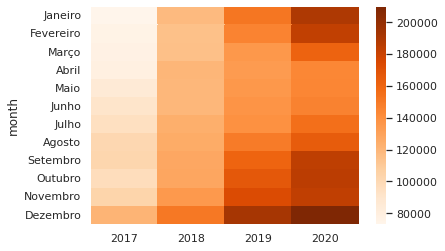

In [ ]:
media_streams_meses_2017 = df_2017.groupby('month')
s1 = media_streams_meses_2017.Streams.mean()
s1.name = '2017'
s1 = s1.reindex(index = ['Janeiro', 'Fevereiro', 'Março', 'Abril', 'Maio', 'Junho', 'Julho', 'Agosto', 'Setembro', 'Outubro', 'Novembro', 'Dezembro'])

media_streams_meses_2018 = df_2018.groupby('month')
s2 = media_streams_meses_2018.Streams.mean()
s2.name = '2018'
s2 = s2.reindex(index = ['Janeiro', 'Fevereiro', 'Março', 'Abril', 'Maio', 'Junho', 'Julho', 'Agosto', 'Setembro', 'Outubro', 'Novembro', 'Dezembro'])


media_streams_meses_2019 = df_2019.groupby('month')
s3 = media_streams_meses_2019.Streams.mean()
s3.name = '2019'
s3 = s3.reindex(index = ['Janeiro', 'Fevereiro', 'Março', 'Abril', 'Maio', 'Junho', 'Julho', 'Agosto', 'Setembro', 'Outubro', 'Novembro', 'Dezembro'])


media_streams_meses_2020 = df_2020.groupby('month')
s4 = media_streams_meses_2020.Streams.mean()
s4.name = '2020'
s4 = s4.reindex(index = ['Janeiro', 'Fevereiro', 'Março', 'Abril', 'Maio', 'Junho', 'Julho', 'Agosto', 'Setembro', 'Outubro', 'Novembro', 'Dezembro'])

df_mapa_calor_meses = pd.concat([s1, s2, s3, s4], axis=1)
print(df_mapa_calor_meses.head())

sns.heatmap(data=df_mapa_calor_meses, cmap = 'Oranges')

In [ ]:
media_streams_meses_2017 = df_2017.groupby('weekday')
s5 = media_streams_meses_2017.Streams.mean()
s5.name = '2017'
s5 = s5.reindex(index = ['Domingo', 'Segunda', 'Terça', 'Quarta', 'Quinta', 'Sexta', 'Sábado'])

media_streams_meses_2018 = df_2018.groupby('weekday')
s6 = media_streams_meses_2018.Streams.mean()
s6.name = '2018'
s6 = s6.reindex(index = ['Domingo', 'Segunda', 'Terça', 'Quarta', 'Quinta', 'Sexta', 'Sábado'])

media_streams_meses_2019 = df_2019.groupby('weekday')
s7 = media_streams_meses_2019.Streams.mean()
s7.name = '2019'
s7 = s7.reindex(index = ['Domingo', 'Segunda', 'Terça', 'Quarta', 'Quinta', 'Sexta', 'Sábado'])


media_streams_meses_2020 = df_2020.groupby('weekday')
s8 = media_streams_meses_2020.Streams.mean()
s8.name = '2020'
s8 = s8.reindex(index = ['Domingo', 'Segunda', 'Terça', 'Quarta', 'Quinta', 'Sexta', 'Sábado'])


df_mapa_calor_dias_semana = pd.concat([s5, s6, s7, s8], axis=1)
df_mapa_calor_dias_semana

sns.heatmap(data=df_mapa_calor_dias_semana, cmap = 'Blues')

#### Boxplots - Análise relacionada à quantidade de Streams de uma música do top 1 ao top 5

##### Ano de 2017

In [ ]:
df_posicao_1_a_5_2017 = df_2017.loc[(df_2017.Position == 1) | (df_2017.Position == 2) | (df_2017.Position == 3) | (df_2017.Position == 4) | (df_2017.Position == 5)]

with sns.axes_style(style='ticks'):
    g = sns.factorplot("Position", "Streams", data=df_posicao_1_a_5_2017, kind="box")

##### Ano de 2018

In [ ]:
df_posicao_1_a_5_2018 = df_2018.loc[(df_2018.Position == 1) | (df_2018.Position == 2) | (df_2018.Position == 3) | (df_2018.Position == 4) | (df_2018.Position == 5)]

with sns.axes_style(style='ticks'):
    g = sns.factorplot("Position", "Streams", data=df_posicao_1_a_5_2018, kind="box")

##### Ano de 2019

In [ ]:
df_posicao_1_a_5_2019 = df_2019.loc[(df_2019.Position == 1) | (df_2019.Position == 2) | (df_2019.Position == 3) | (df_2019.Position == 4) | (df_2019.Position == 5)]

with sns.axes_style(style='ticks'):
    g = sns.factorplot("Position", "Streams", data=df_posicao_1_a_5_2019, kind="box")

##### Ano de 2020

In [ ]:
df_posicao_1_a_5_2020 = df_2020.loc[(df_2020.Position == 1) | (df_2020.Position == 2) | (df_2020.Position == 3) | (df_2020.Position == 4) | (df_2020.Position == 5)]

with sns.axes_style(style='ticks'):
    g = sns.factorplot("Position", "Streams", data=df_posicao_1_a_5_2020, kind="box")